Weighted Pre-Treatment Speed: 27.55 mph
Weighted Post-Treatment Speed: 23.22 mph
T-Statistic: 41.802, P-Value: 0.000


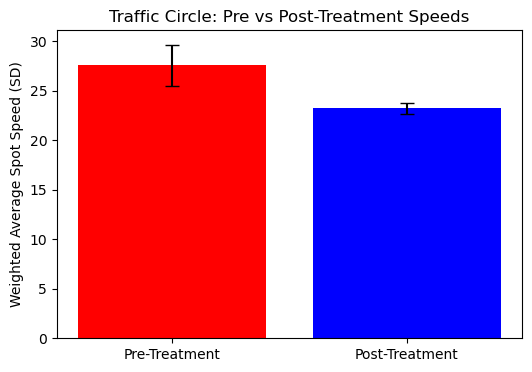

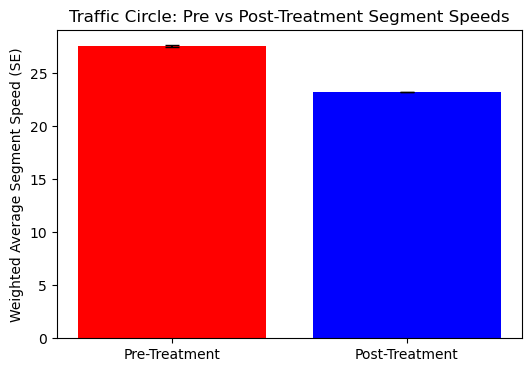

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Hoover_segment_pre2.csv')
post_treatment = pd.read_csv('data/Hoover_segment_post2.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

pre_speeds = pre_treatment['Avg Segment Speed (mph)']
post_speeds = post_treatment['Avg Segment Speed (mph)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Segment Speeds')
plt.show()




In [4]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

Weighted Pre-Treatment 85th Speed Percentile: 35.28 mph
Weighted Post-Treatment 85th Speed Percentile: 30.84 mph
Weighted Pre-Treatment 95th Speed Percentile: 38.97 mph
Weighted Post-Treatment 95th Speed Percentile: 34.38 mph


In [5]:
max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['95th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('85th Speed Percentile', ascending = False).head(10)
top_speed

Highest value for pre-treatment'85th Speed Percentile': 42.0 mph Highest value for post-treatment'85th Speed Percentile': 38.0 mph
Data Periods                                             Jan 01, 2022 - Dec 31, 2022
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                             South Hoover Street / 17167706
Line Zone Length (Miles)                                                       0.301
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         180
Zone is Bi-Direction                                                             yes
Year-Month                                                                   2022-01
Day Type                                                             1: Monday (M-M)
Day Part           

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Average Daily Segment Traffic (StL Volume),Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,85th Speed Percentile,95th Speed Percentile
14,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-01,2: Tuesday (Tu-Tu),...,1105,30,37,31.421,0.941,333.06,0.67,13.0,38.0,42.0
8,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-01,1: Monday (M-M),...,974,30,37,31.421,0.943,293.66,0.56,13.0,38.0,42.0
7,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-01,1: Monday (M-M),...,285,31,36,31.421,0.972,85.94,0.08,16.0,38.0,42.0
332,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-07,7: Sunday (Su-Su),...,363,29,37,30.143,0.970,109.46,0.11,13.0,38.0,42.0
272,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-06,5: Friday (F-F),...,1091,29,37,31.281,0.936,328.94,0.72,13.0,38.0,41.0
260,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-06,3: Wednesday (W-W),...,1167,29,37,31.281,0.938,351.81,0.74,13.0,38.0,41.0
20,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-01,3: Wednesday (W-W),...,1052,29,37,31.421,0.933,317.26,0.73,13.0,38.0,42.0
266,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-06,4: Thursday (Th-Th),...,1126,30,37,31.281,0.947,339.35,0.60,13.0,38.0,42.0
199,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-05,1: Monday (M-M),...,353,30,36,30.792,0.983,106.45,0.06,15.0,38.0,42.0
26,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-01,4: Thursday (Th-Th),...,1111,29,37,31.421,0.937,335.01,0.72,13.0,38.0,42.0


In [6]:
max_95th_speed_row_pre = pre_treatment.loc[pre_treatment['95th Speed Percentile'].idxmax()]
max_95th_speed_row_post = post_treatment.loc[post_treatment['95th Speed Percentile'].idxmax()]

max_95th_speed_value_pre = max_95th_speed_row_pre['95th Speed Percentile']
max_95th_speed_value_post = max_95th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'95th Speed Percentile': {max_95th_speed_value_pre} mph",
     f"Highest value for post-treatment'95th Speed Percentile': {max_95th_speed_value_post} mph")
print(max_95th_speed_row_pre,max_95th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

Highest value for pre-treatment'95th Speed Percentile': 44.0 mph Highest value for post-treatment'95th Speed Percentile': 40.0 mph
Data Periods                                             Jan 01, 2022 - Dec 31, 2022
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                             South Hoover Street / 17167706
Line Zone Length (Miles)                                                       0.301
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         180
Zone is Bi-Direction                                                             yes
Year-Month                                                                   2022-05
Day Type                                                          2: Tuesday (Tu-Tu)
Day Part           

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Average Daily Segment Traffic (StL Volume),Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,85th Speed Percentile,95th Speed Percentile
205,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-05,2: Tuesday (Tu-Tu),...,286,30,36,30.792,0.975,86.21,0.07,14.0,38.0,44.0
115,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-03,3: Wednesday (W-W),...,279,29,37,30.804,0.949,84.13,0.15,14.0,37.0,43.0
67,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-02,3: Wednesday (W-W),...,283,31,36,31.692,0.965,85.46,0.10,16.0,38.0,43.0
151,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-04,1: Monday (M-M),...,337,29,37,30.809,0.957,101.47,0.15,14.0,38.0,43.0
61,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-02,2: Tuesday (Tu-Tu),...,273,30,36,31.692,0.951,82.29,0.13,15.0,38.0,43.0
295,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-07,1: Monday (M-M),...,426,31,35,30.143,1.000,128.44,0.00,16.0,38.0,43.0
43,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-01,7: Sunday (Su-Su),...,198,30,36,31.421,0.947,59.82,0.11,15.0,37.0,43.0
253,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-06,2: Tuesday (Tu-Tu),...,270,30,36,31.281,0.963,81.30,0.10,16.0,38.0,43.0
80,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-02,5: Friday (F-F),...,1226,30,37,31.692,0.933,369.63,0.83,12.0,38.0,42.0
116,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street / 17167706,0.301,yes,180,yes,2022-03,3: Wednesday (W-W),...,1327,30,37,30.804,0.959,399.97,0.56,13.0,38.0,42.0


In [7]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Segment Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Segment Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")


Total Pre-Treatment Volume: 415,715
Total Post-Treatment Volume: 416,978
Combined Volume (Pre + Post): 832,693


In [8]:
results = {
    'Intersection': 'Hoover & 110th Pl',
'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Treatment_Volume': int(total_pre_volume),
    'Post_Treatment_Volume': int(total_post_volume),
    'Combined_Volumne': int(total_combined_volume)
}
import json
with open('../results/Hoover & 110th Pl_summary.json', 'w') as f:
    json.dump(results, f)